In [ ]:
Name: Ruotian Jiang ID:8389636738

# 1. Active Learning Using Support Vector Machines

# a & b (i)

In [270]:
import numpy as np  
import pandas as pd 
from sklearn.model_selection import train_test_split
# from sklearn.utils import shuffle
  
txt = np.loadtxt('data_banknote_authentication.txt',delimiter=',')
df = pd.DataFrame(txt)  
train, test = train_test_split(df, train_size=900)


# print train.applymap(lambda x: x + np.random.rand()/90.0)


In [271]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

def passive(train, test):
    error=[]
    train = train.sample(frac=1) 
    # shuffle the train set for random select
    while int(train.iloc[:10,4:5].sum()) in [10,9,1,0]:
        train = train.sample(frac=1) 
        
    
    train = train.reset_index(drop=True)
    #debug 
    train_X = train.iloc[:,0:4]
    train_y = train.iloc[:,4:5]
    test_X = test.iloc[:,0:4]
    test_y = test.iloc[:,4:5]
    for i in range(90):
        subtrain_X = train_X[:(i+1)*10]
        subtrain_y = train_y[:(i+1)*10]
        clf = svm.LinearSVC(penalty='l1',dual=False)

        parameters = {'C':np.logspace(-2, 10, num=10, base=2)}
#       he weight of the SVM penalty
        if i == 0:
            cv = KFold(10)
        else:
            cv = StratifiedKFold(10)
        grid = GridSearchCV(clf,parameters,cv=cv)
        grid.fit(subtrain_X,subtrain_y)
        error.append(1 - grid.score(test_X,test_y))
    return error

passive_error=[]
for i in range(50):
    passive_error.append(passive(train,test))
    if i in [9,19,29,39]:
        print i+1 
#  supervise the processing
print passive_error



10
20
30
40
[[0.033898305084745783, 0.0084745762711864181, 0.052966101694915224, 0.05084745762711862, 0.042372881355932202, 0.036016949152542388, 0.038135593220338992, 0.038135593220338992, 0.019067796610169441, 0.029661016949152574, 0.029661016949152574, 0.02754237288135597, 0.031779661016949179, 0.031779661016949179, 0.031779661016949179, 0.031779661016949179, 0.029661016949152574, 0.029661016949152574, 0.012711864406779627, 0.0021186440677966045, 0.012711864406779627, 0.010593220338983023, 0.016949152542372836, 0.014830508474576232, 0.014830508474576232, 0.010593220338983023, 0.0063559322033898136, 0.0063559322033898136, 0.0084745762711864181, 0.0084745762711864181, 0.0084745762711864181, 0.0084745762711864181, 0.0084745762711864181, 0.0084745762711864181, 0.0084745762711864181, 0.0084745762711864181, 0.0084745762711864181, 0.010593220338983023, 0.0084745762711864181, 0.0084745762711864181, 0.0084745762711864181, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.00

# b (ii)
And that is easy to interpret: The desion function tells us on which side of the hyperplane generated by the classifier we are (and how far we are away from it). Based on that information, the estimator then label the examples with the corresponding label.

In [272]:
def active(train, test):
    error=[]
    train = train.sample(frac=1)
    # shuffle the train set for random select
    while int(train.iloc[:10,4:5].sum()) in [10,9,1,0]:
        train = train.sample(frac=1) 

    #debug 

    train = train.reset_index(drop=True)
    def selectpoints(x,grid):
    #     The desion function tells us on which side of the hyperplane generated by the
    #     classifier we are (and how far we are away from it). Based on that information, 
    #     the estimator then label the examples with the corresponding label.

        dist=grid.decision_function(x)
        myList=dist.tolist()
        dist=map(abs, myList)
        k = 10
        index = sorted(range(len(dist)), key=lambda k: dist[k],reverse=False)[0:k]
        #get 10 points index
        return index


    test_X = test.iloc[:,0:4]
    test_y = test.iloc[:,4:5]

    for i in range(90):
        if i == 0:
            subtrain= train[:10]
            lefttrain = train[10:]
            subtrain_X = subtrain.iloc[:,0:4]
            left_X = lefttrain.iloc[:,0:4]
            subtrain_y = subtrain.iloc[:,4:5]
            left_y = lefttrain.iloc[:,4:5]
        else:
            left_X = left_X.reset_index(drop=True)
            left_y = left_y.reset_index(drop=True)
            index = selectpoints(left_X,grid)
            subtrain_X = pd.concat([subtrain_X,left_X.iloc[index]])
            left_X = left_X.drop(index)
            subtrain_y = pd.concat([subtrain_y,left_y.iloc[index]])
            left_y = left_y.drop(index)        
        clf = svm.LinearSVC(penalty='l1',dual=False)
        parameters = {'C':np.logspace(-2, 10, num=10, base=2)}
#       he weight of the SVM penalty
        if i == 0:
            cv = KFold(10)
        else:
            cv = StratifiedKFold(10)
        grid = GridSearchCV(clf,parameters,cv=cv)
        grid.fit(subtrain_X,subtrain_y)
        error.append (1 - grid.score(test_X,test_y))
    return error
    #     print grid.best_estimator_.coef_
    #     print grid.best_estimator_.intercept_

active_error=[]
for i in range(50):
    active_error.append(active(train,test))
    if i in [9,19,29,39]:
        print i+1 
#  supervise the processing


print active_error






10
20


/Library/Python/2.7/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


30
40
[[0.22457627118644063, 0.025423728813559365, 0.038135593220338992, 0.076271186440677985, 0.012711864406779627, 0.010593220338983023, 0.016949152542372836, 0.012711864406779627, 0.0084745762711864181, 0.0084745762711864181, 0.0084745762711864181, 0.0084745762711864181, 0.0084745762711864181, 0.0084745762711864181, 0.0084745762711864181, 0.0084745762711864181, 0.0084745762711864181, 0.0084745762711864181, 0.0084745762711864181, 0.0084745762711864181, 0.0084745762711864181, 0.0084745762711864181, 0.0084745762711864181, 0.0084745762711864181, 0.0084745762711864181, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.0084745762711864181, 0.0084745762711864181, 0.0084745762711864181, 0.0084745762711864181, 0.0084745762711864181, 0.0084745762711864181, 0.0084745762711864181, 0.0084745762711864181, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.0084745762711864181, 0.0084745762711864181, 0.008474576271186418

# c

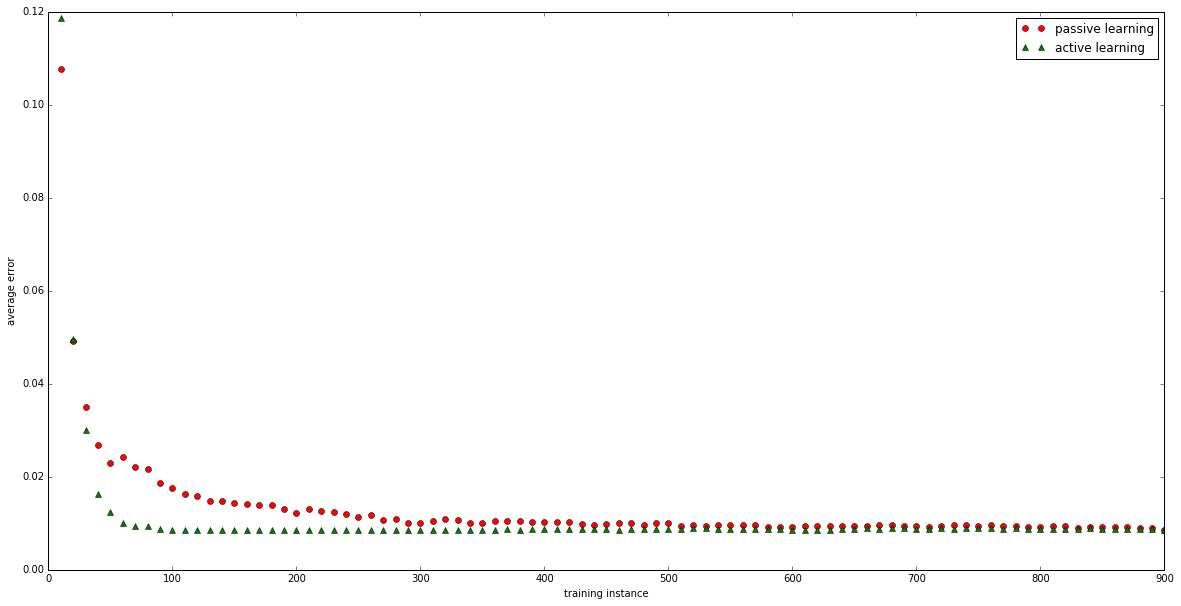

In [277]:
import matplotlib.pyplot as plt

x=range(10,901,10)

pe=np.array(passive_error).T
ae=np.array(active_error).T
p_error=[]
a_error=[]
for i in pe:
    p_error.append(np.mean(i))
for i in ae:
    a_error.append(np.mean(i))
plt.figure(figsize=(20,10))
plt.ylabel('average error')
plt.xlabel('training instance')
plt.plot(x, p_error, 'ro', label = 'passive learning')
plt.plot(x, a_error, 'g^',label = 'active learning')
plt.legend(loc='upper right')
plt.show()








obviously, active learning has lower average error and is a better classifier in the begnning, but when the training instance is increasing, they perform more similarly. activ learning is learing faster. 